# 1. Fashion MNIST 모델

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

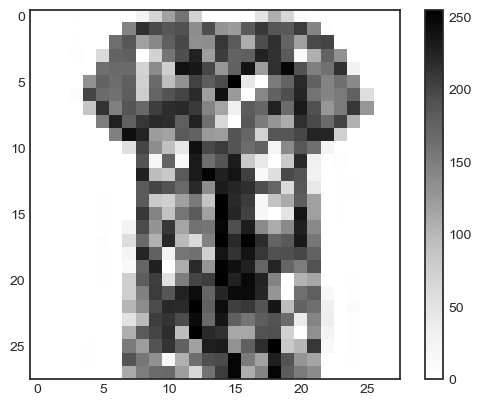

In [5]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

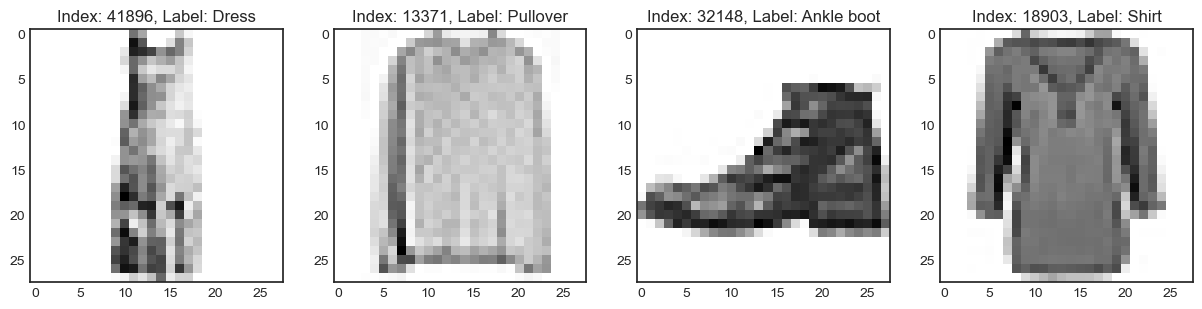

In [6]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [9]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [10]:
# 데이터 정규화
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [11]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 2s 4ms/step - loss: 2.1752 - accuracy: 0.3547 - val_loss: 2.0227 - val_accuracy: 0.4403
Epoch 2/60
83/83 [==============================] - 0s 2ms/step - loss: 1.9033 - accuracy: 0.5767 - val_loss: 1.7906 - val_accuracy: 0.6144
Epoch 3/60
83/83 [==============================] - 0s 2ms/step - loss: 1.6986 - accuracy: 0.6406 - val_loss: 1.6083 - val_accuracy: 0.6568
Epoch 4/60
83/83 [==============================] - 0s 2ms/step - loss: 1.5387 - accuracy: 0.6744 - val_loss: 1.4704 - val_accuracy: 0.6673
Epoch 5/60
83/83 [==============================] - 0s 2ms/step - loss: 1.4129 - accuracy: 0.6915 - val_loss: 1.3582 - val_accuracy: 0.6746
Epoch 6/60
83/83 [==============================] - 0s 2ms/step - loss: 1.3127 - accuracy: 0.7016 - val_loss: 1.2688 - val_accuracy: 0.6878
Epoch 7/60
83/83 [==============================] - 0s 2ms/step - loss: 1.2318 - accuracy: 0.7075 - val_loss: 1.1960 - val_accuracy: 0.7080
Epoch 8/60
83/83 [==

In [15]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

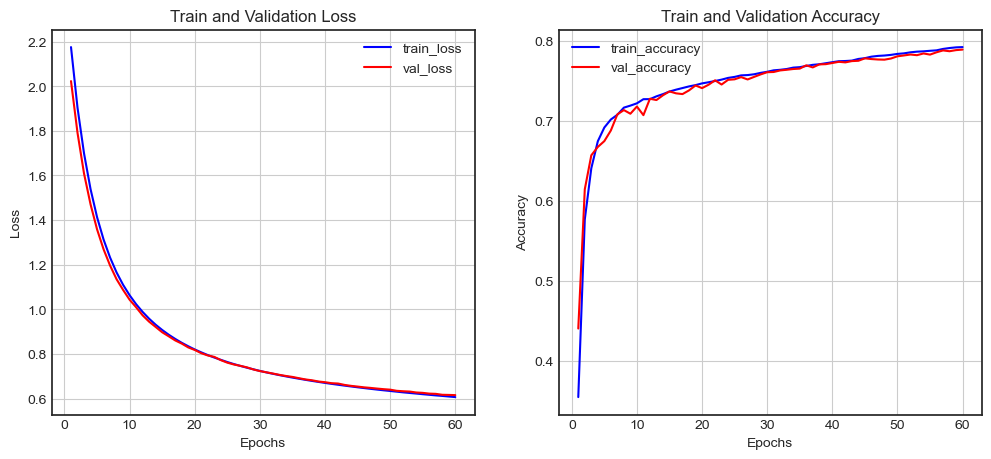

In [16]:
show_history(history)

In [23]:
# loss & accuracy
model.evaluate(x_test, y_test) # defalt batch_size=32, 따라서 10000/32 = 312.5(313)

313/313 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.7803


[0.6268095970153809, 0.7803000211715698]

In [24]:
pred_ys = model.predict(x_test) # defalt batch_size=32, 따라서 10000/32 = 312.5(313)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 0s 744us/step
[1.2817882e-02 9.4437551e-01 3.2957571e-03 1.7292790e-02 1.4648724e-02
 4.3617176e-05 7.3942961e-03 2.4599538e-05 9.2975723e-05 1.3807119e-05]
1
Trouser


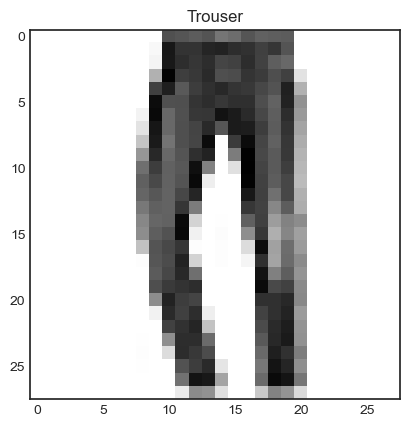

In [31]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [42]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel(f'{class_names[predicted_label]} {100*np.max(pred_ys):2.0f}% ({class_names[y_test]})', color=color)

In [43]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

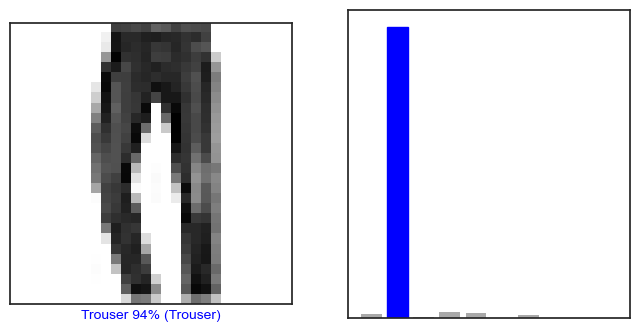

In [44]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

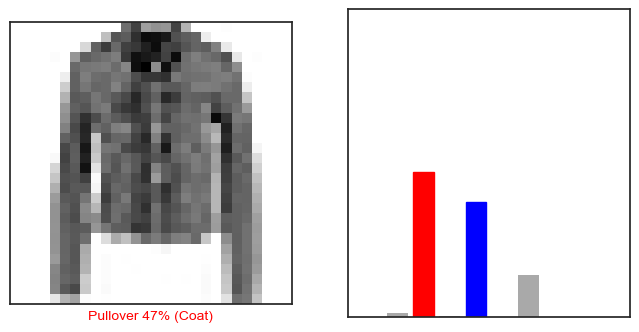

In [45]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

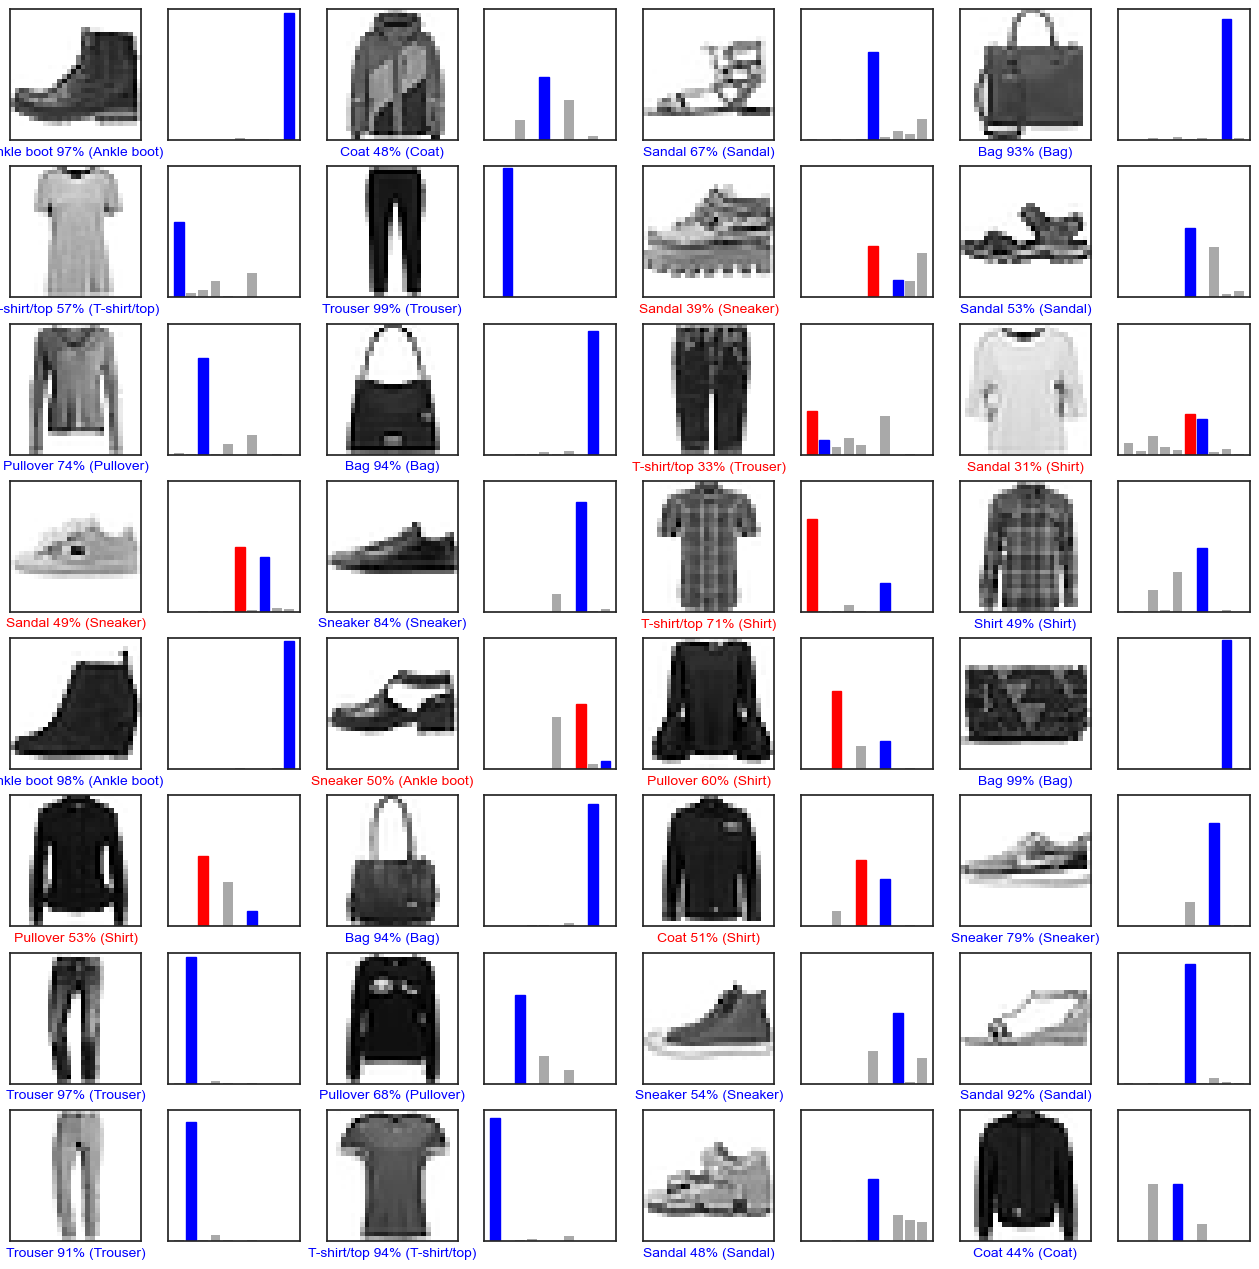

In [46]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [47]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.74      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.71      0.57      0.63      1000
       Dress       0.75      0.85      0.80      1000
        Coat       0.68      0.67      0.67      1000
      Sandal       0.83      0.86      0.84      1000
       Shirt       0.46      0.53      0.50      1000
     Sneaker       0.86      0.83      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



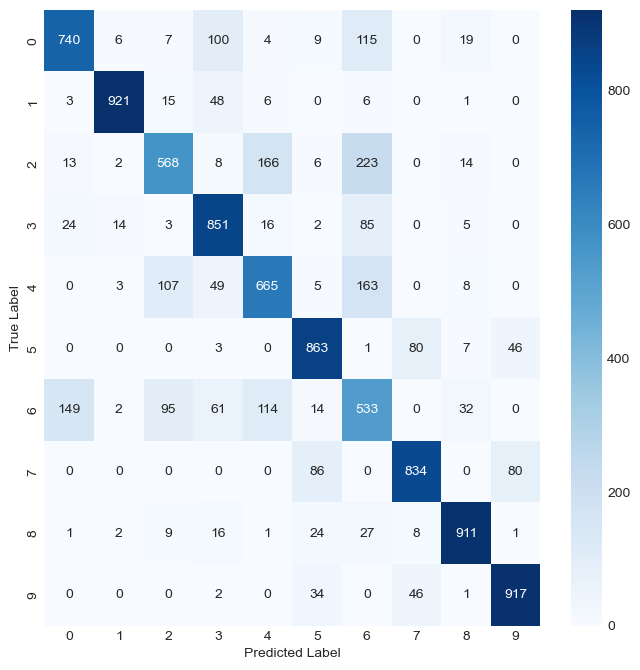

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. 모델 최적화

In [49]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5929 - accuracy: 0.7954 - val_loss: 0.5819 - val_accuracy: 0.7991
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5653 - accuracy: 0.8044 - val_loss: 0.5616 - val_accuracy: 0.8033
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5449 - accuracy: 0.8110 - val_loss: 0.5446 - val_accuracy: 0.8126
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5290 - accuracy: 0.8160 - val_loss: 0.5319 - val_accuracy: 0.8145
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5155 - accuracy: 0.8203 - val_loss: 0.5252 - val_accuracy: 0.8141
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5054 - accuracy: 0.8228 - val_loss: 0.5097 - val_accuracy: 0.8247
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4955 - accuracy: 0.8262 - val_loss: 0.5048 - val_accuracy:

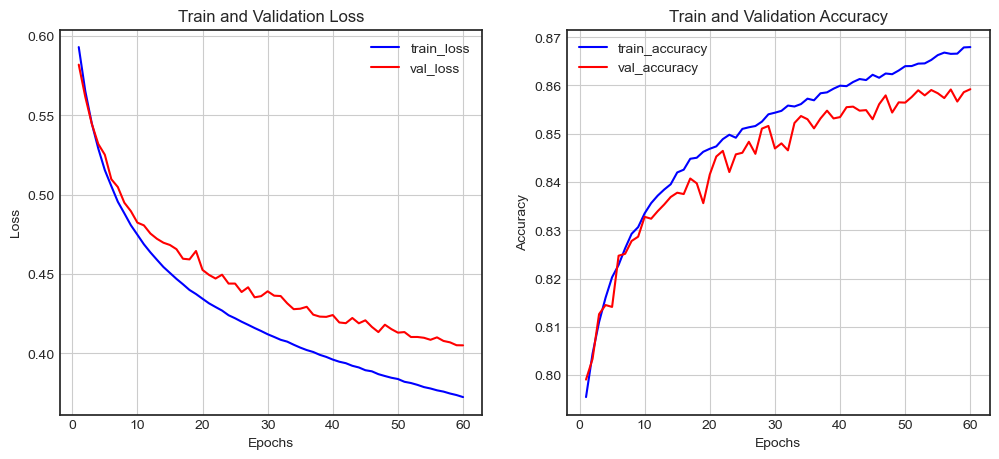

In [50]:
show_history(history)

In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8494


[0.4235127568244934, 0.849399983882904]

## 2-1. 비선형함수 relu 도입

In [52]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.7657 - accuracy: 0.7545 - val_loss: 0.6005 - val_accuracy: 0.7957
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5254 - accuracy: 0.8232 - val_loss: 0.5419 - val_accuracy: 0.8134
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4769 - accuracy: 0.8364 - val_loss: 0.4780 - val_accuracy: 0.8383
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4522 - accuracy: 0.8435 - val_loss: 0.4744 - val_accuracy: 0.8343
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4320 - accuracy: 0.8494 - val_loss: 0.4758 - val_accuracy: 0.8403
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4178 - accuracy: 0.8557 - val_loss: 0.4367 - val_accuracy: 0.8528
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4055 - accuracy: 0.8583 - val_loss: 0.4260 - val_accuracy:

In [54]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

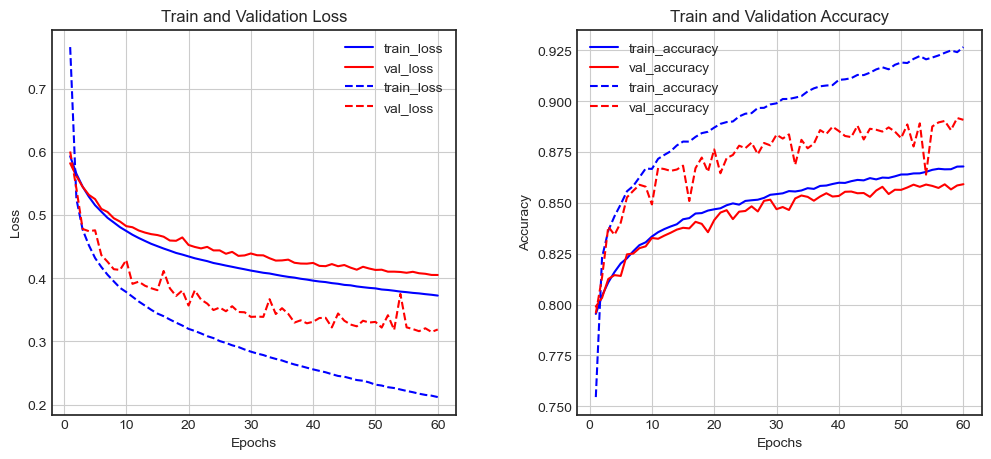

In [55]:
diff_history(history, history2)

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8805


[0.34138357639312744, 0.8805000185966492]

## 2-2. opimizer='adam' 도입

In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8640 - val_loss: 0.3577 - val_accuracy: 0.8753
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8776 - val_loss: 0.4299 - val_accuracy: 0.8423
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3054 - accuracy: 0.8873 - val_loss: 0.3451 - val_accuracy: 0.8819
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2898 - accuracy: 0.8925 - val_loss: 0.3338 - val_accuracy: 0.8849
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2724 - accuracy: 0.8996 - val_loss: 0.3318 - val_accuracy: 0.8808
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9025 - val_loss: 0.3325 - val_accuracy: 0.8856
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.9072 - val_loss: 0.3408 - val_accuracy:

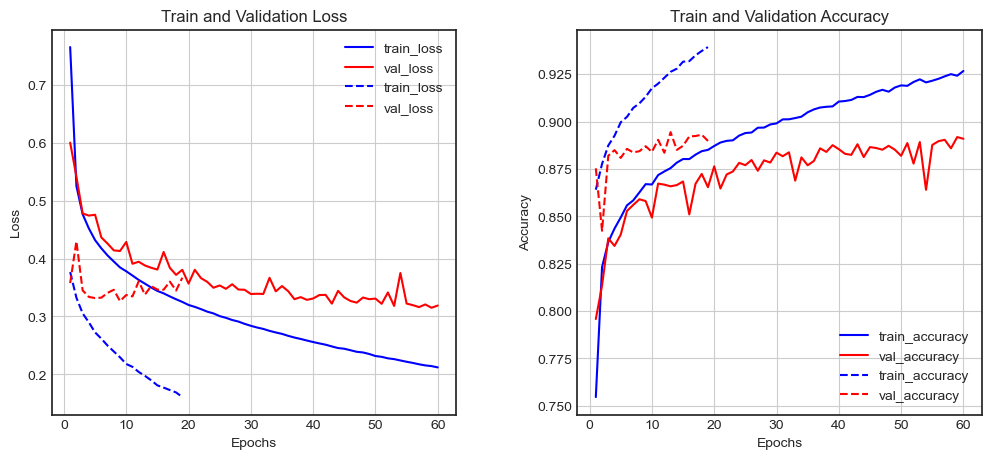

In [61]:
diff_history(history2, history3)

In [62]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8784


[0.3449091911315918, 0.8784000277519226]

## 2-3. L2 규제 추가

In [64]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, 
                       activation='relu',
                       kernel_regularizer=regularizers.l2(0.0001))) # L2규제 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [65]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5665 - accuracy: 0.8180 - val_loss: 0.4553 - val_accuracy: 0.8578
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4398 - accuracy: 0.8615 - val_loss: 0.4210 - val_accuracy: 0.8692
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8689 - val_loss: 0.4654 - val_accuracy: 0.8506
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3915 - accuracy: 0.8766 - val_loss: 0.3954 - val_accuracy: 0.8808
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3770 - accuracy: 0.8818 - val_loss: 0.4303 - val_accuracy: 0.8671
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3669 - accuracy: 0.8851 - val_loss: 0.4077 - val_accuracy: 0.8794
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3552 - accuracy: 0.8887 - val_loss: 0.4216 - val_accuracy:

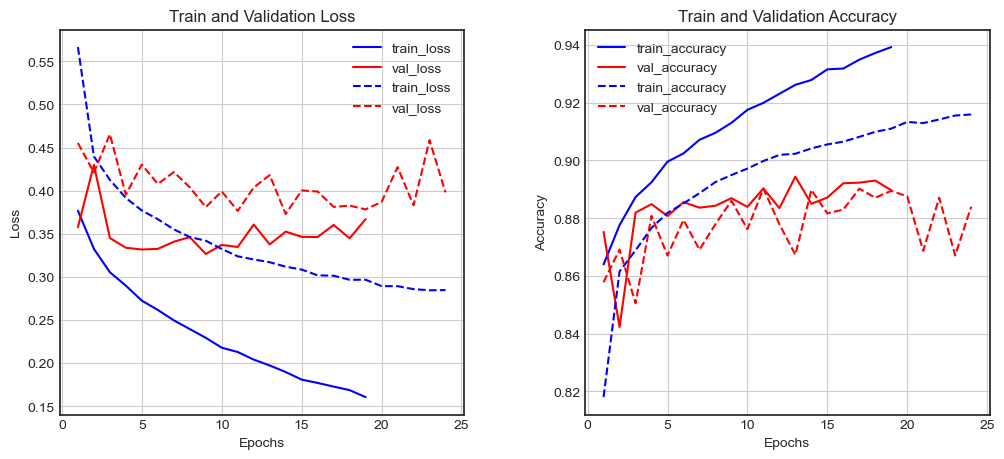

In [66]:
diff_history(history3, history4)

In [67]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8810


[0.3921334147453308, 0.8809999823570251]

## 2-4. 드롭아웃

In [84]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, 
                       activation='relu',
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.2))  # ← Dropout 20% 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [85]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5921 - accuracy: 0.8088 - val_loss: 0.4900 - val_accuracy: 0.8443
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4675 - accuracy: 0.8520 - val_loss: 0.4479 - val_accuracy: 0.8614
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4454 - accuracy: 0.8605 - val_loss: 0.4626 - val_accuracy: 0.8556
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4272 - accuracy: 0.8660 - val_loss: 0.4330 - val_accuracy: 0.8649
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4177 - accuracy: 0.8687 - val_loss: 0.4443 - val_accuracy: 0.8636
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4081 - accuracy: 0.8727 - val_loss: 0.4157 - val_accuracy: 0.8765
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4016 - accuracy: 0.8760 - val_loss: 0.4322 - val_accuracy:

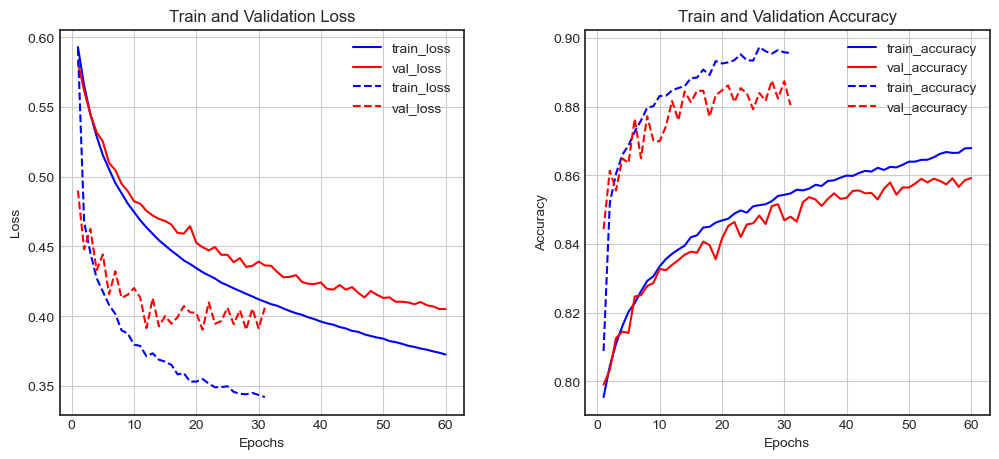

In [86]:
diff_history(history, history5)

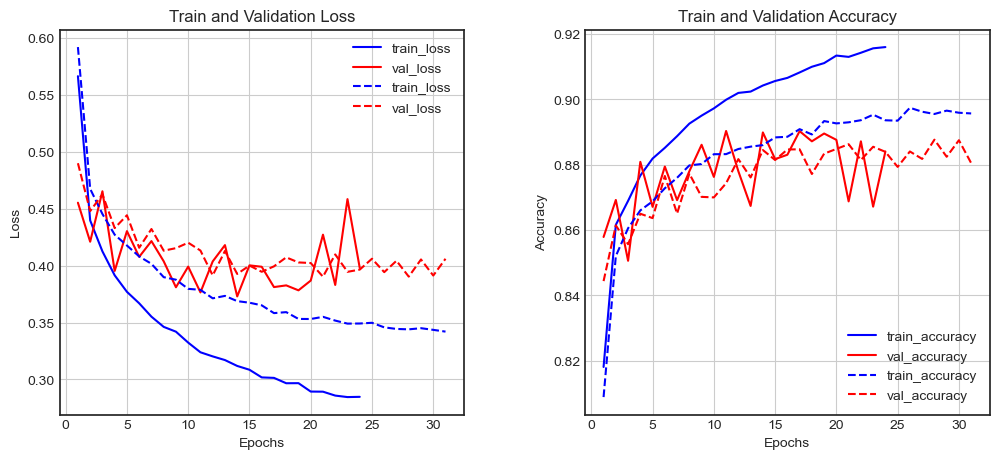

In [87]:
diff_history(history4, history5)

In [88]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8746


[0.4113426208496094, 0.8745999932289124]

## 2-6. 배치정규화

In [89]:
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512,
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization()) # 배치정규화
model.add(layers.Activation('relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________
Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5432 - accuracy: 0.8282 - val_l

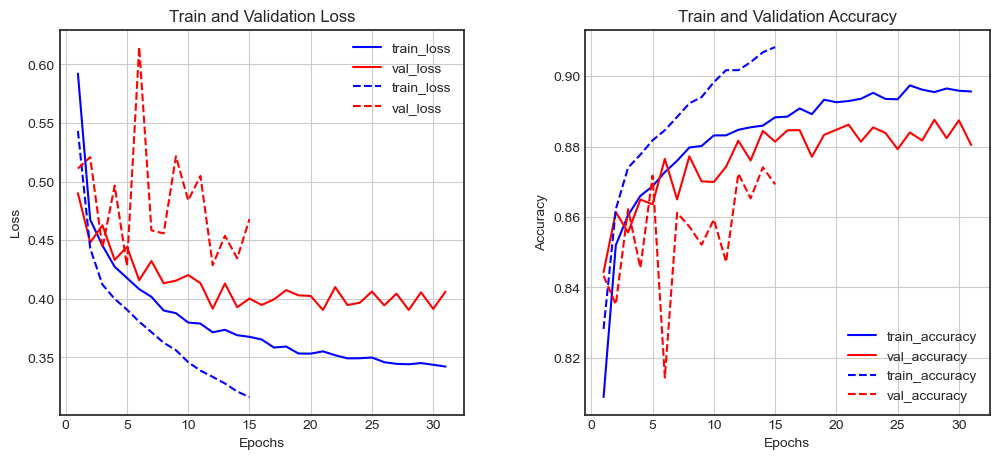

In [90]:
diff_history(history5, history6)

In [91]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8637


[0.44610297679901123, 0.8636999726295471]

## 2-7 배치정규화 + 드롭아웃

In [92]:
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512,
                       kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.BatchNormalization()) # 배치정규화
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2)) # 드롭아웃 20%
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
___________________________________________

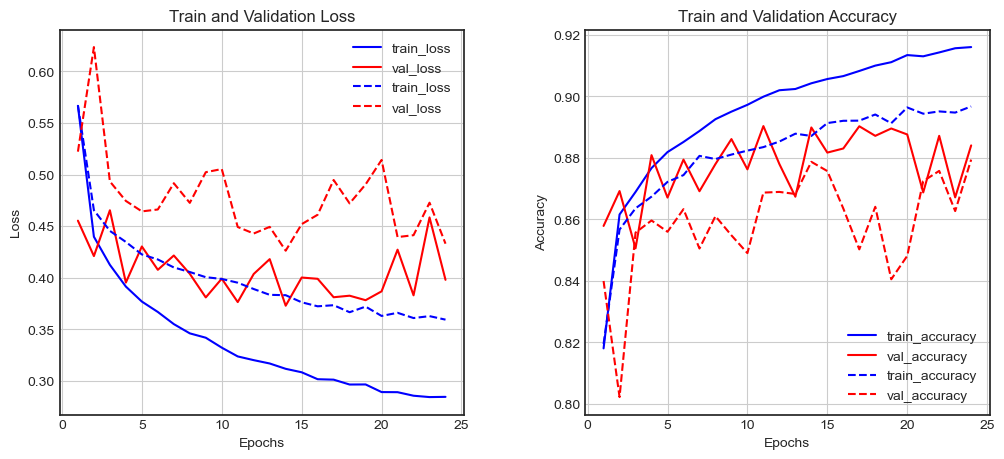

In [93]:
diff_history(history4, history7)

In [94]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.8668


[0.45312294363975525, 0.8668000102043152]

# 3. 모델 결과 분석

In [100]:
pred_ys = model.predict(x_test) 
arg_pred_y = np.argmax(pred_ys, axis=1)

313/313 [==============================] - 0s 960us/step


## 3-1. 랜덤 데이터 선정하여 분류 결과 시각화

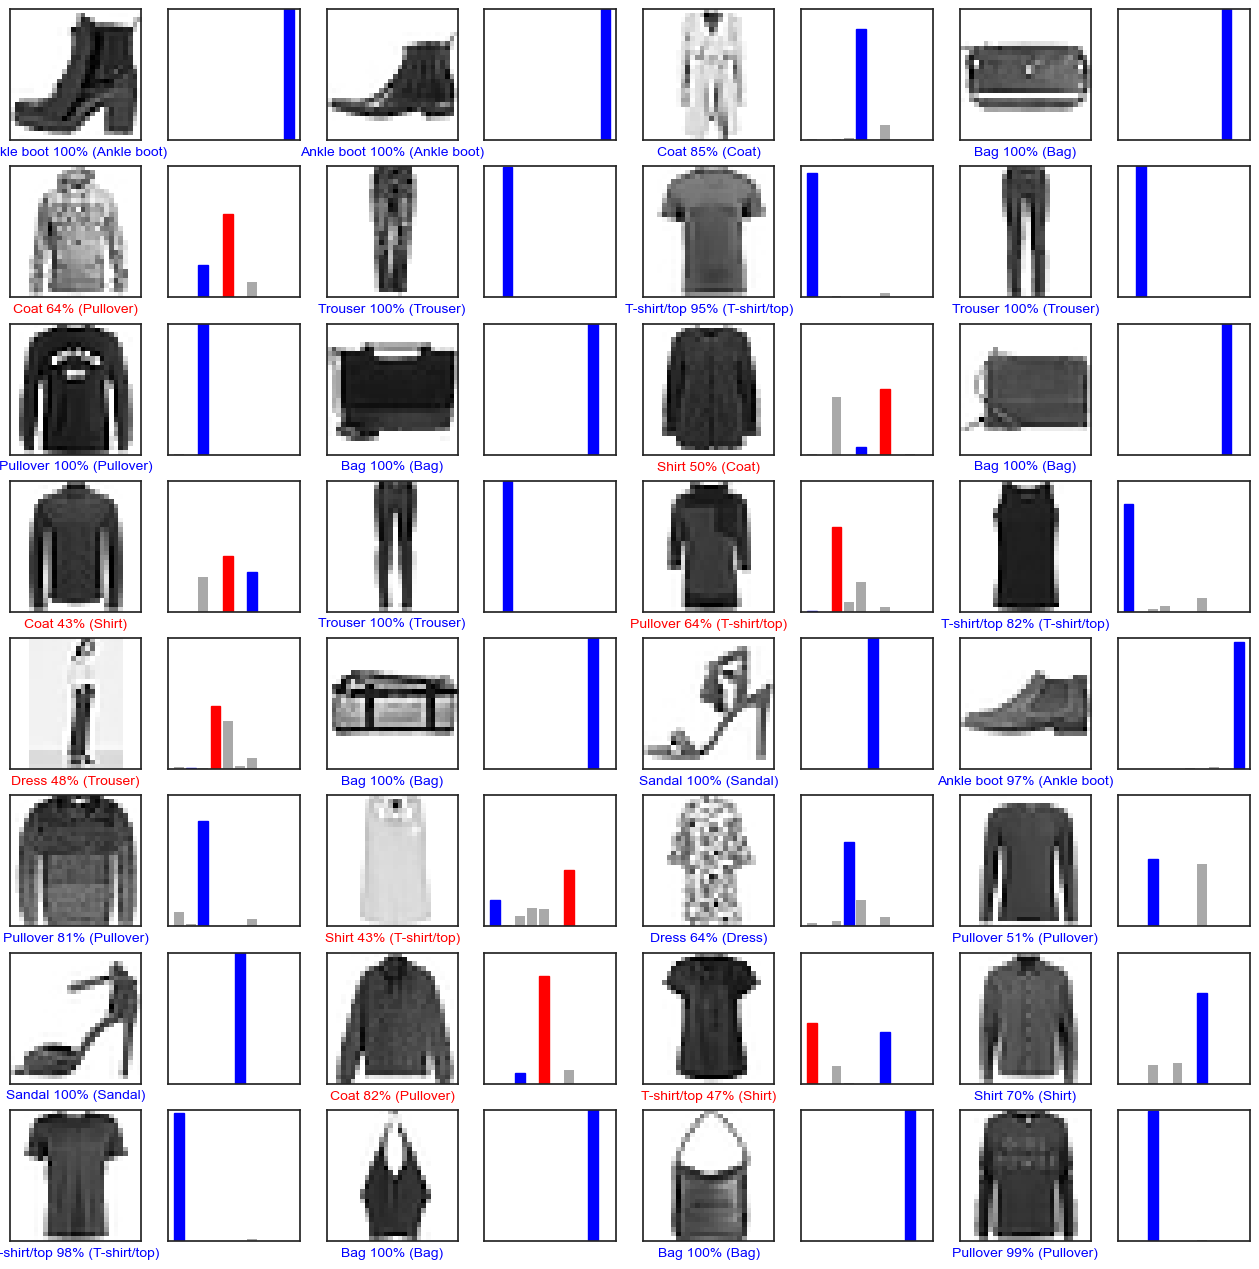

In [101]:
### 상단에 이미 함수 선언 완료
# # 이미지 시각화 함수
# def plot_image(i, pred_ys, y_test, img):
#     pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
#     plt.grid(False)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(img, cmap=plt.cm.binary)

#     predicted_label = np.argmax(pred_ys)
#     if predicted_label == y_test:
#         color = 'blue'
#     else:
#         color = 'red'
  
#     plt.xlabel(f'{class_names[predicted_label]} {100*np.max(pred_ys):2.0f}% ({class_names[y_test]})', color=color)

# # 클래스별 시각화
# def plot_class(i, pred_ys, true_label):
#     pred_ys, true_label = pred_ys[i], true_label[i]
#     plt.grid(False)
#     plt.xticks([])
#     plt.yticks([])
#     plt.ylim([0, 1])
#     predicted_label = np.argmax(pred_ys)

#     plot = plt.bar(range(10), pred_ys, color='darkgray')
#     plot[predicted_label].set_color('red')
#     plot[true_label].set_color('blue')


num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

## 3-2. 클래스별 성능지표

In [102]:
y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.77      0.81      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.70      0.84      0.77      1000
       Dress       0.91      0.84      0.87      1000
        Coat       0.79      0.76      0.78      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.67      0.67      0.67      1000
     Sneaker       0.94      0.92      0.93      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## 3-3. Confusion Matrix

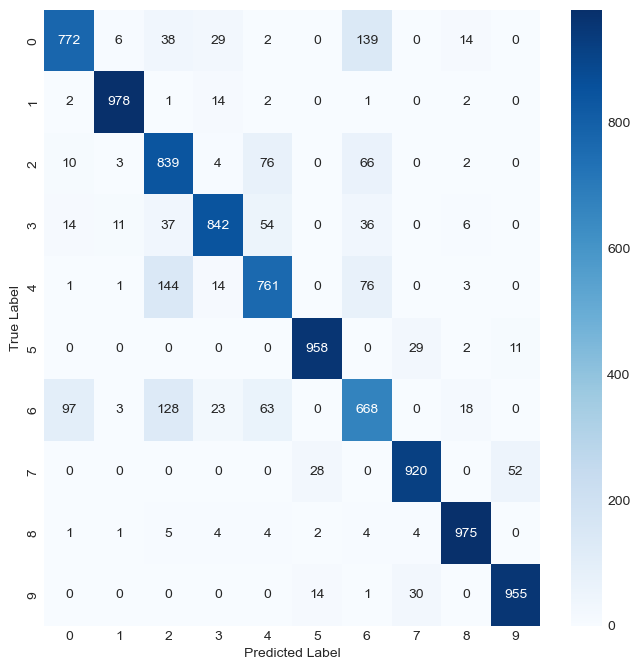

In [103]:
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()